In [335]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
    

In [336]:
df = pd.read_excel("house_price_data_7000.xlsx",engine='openpyxl')
df.head(3)

,Order,Brüt m²,Net m²,Oda Sayısı,Banyo Sayısı,Binadaki Kat Sayısı,Bulunduğu Kat,Bina Yaşı,Isıtma Tipi,Mobilya Durumu,...,Kimden,Krediye Uygun,Location Lat,Location Lon,Location1,Location2,Location3,Aidat,Takasa Uygun,Price
0,1,122,121.0,3+1,2,10-20 arası,7,0,Güneş Enerjisi,NaN,...,NaN,Evet,41.132680,28.832360,Eski Habipler,Sultangazi,İstanbul,0.0,NaN,610000
1,2,127,100.0,2+1,2,20 ve üzeri,10,0,Klima,Eşyasız,...,NaN,Hayır,41.124202,28.770181,Kayabaşı,Başakşehir,İstanbul,0.0,NaN,775000
2,3,130,129.0,2+1,2,5,1,6-10 arası,Klima,Sadece Beyaz Eşya,...,NaN,Evet,41.039231,28.764351,Atakent,Küçükçekmece,İstanbul,0.0,NaN,630000


In [337]:
df.shape

(7039, 24)

In [338]:
df.columns

Index(['Order', 'Brüt m²', 'Net m²', 'Oda Sayısı', 'Banyo Sayısı',
       'Binadaki Kat Sayısı', 'Bulunduğu Kat', 'Bina Yaşı', 'Isıtma Tipi',
       'Mobilya Durumu', 'Kullanım Durumu', 'Yapının Durumu', 'Konut Şekli',
       'Kira Getirisi', 'Kimden', 'Krediye Uygun', 'Location Lat',
       'Location Lon', 'Location1', 'Location2', 'Location3', 'Aidat',
       'Takasa Uygun', 'Price'],
      dtype='object')

In [339]:
df2 = df.drop(["Order"],axis = 1)
df2.head(3)

,Brüt m²,Net m²,Oda Sayısı,Banyo Sayısı,Binadaki Kat Sayısı,Bulunduğu Kat,Bina Yaşı,Isıtma Tipi,Mobilya Durumu,Kullanım Durumu,...,Kimden,Krediye Uygun,Location Lat,Location Lon,Location1,Location2,Location3,Aidat,Takasa Uygun,Price
0,122,121.0,3+1,2,10-20 arası,7,0,Güneş Enerjisi,NaN,NaN,...,NaN,Evet,41.132680,28.832360,Eski Habipler,Sultangazi,İstanbul,0.0,NaN,610000
1,127,100.0,2+1,2,20 ve üzeri,10,0,Klima,Eşyasız,Boş,...,NaN,Hayır,41.124202,28.770181,Kayabaşı,Başakşehir,İstanbul,0.0,NaN,775000
2,130,129.0,2+1,2,5,1,6-10 arası,Klima,Sadece Beyaz Eşya,Boş,...,NaN,Evet,41.039231,28.764351,Atakent,Küçükçekmece,İstanbul,0.0,NaN,630000


In [340]:
df.isna().sum()

Order                     0
Brüt m²                   0
Net m²                   80
Oda Sayısı                2
Banyo Sayısı              1
Binadaki Kat Sayısı     296
Bulunduğu Kat           253
Bina Yaşı               263
Isıtma Tipi             299
Mobilya Durumu          685
Kullanım Durumu         351
Yapının Durumu         2607
Konut Şekli            1388
Kira Getirisi          1766
Kimden                 2765
Krediye Uygun             0
Location Lat             55
Location Lon             55
Location1                 0
Location2                 0
Location3                 0
Aidat                  2276
Takasa Uygun           5277
Price                     0
dtype: int64

In [341]:
df2.dtypes

Brüt m²                  int64
Net m²                 float64
Oda Sayısı              object
Banyo Sayısı            object
Binadaki Kat Sayısı     object
Bulunduğu Kat           object
Bina Yaşı               object
Isıtma Tipi             object
Mobilya Durumu          object
Kullanım Durumu         object
Yapının Durumu          object
Konut Şekli             object
Kira Getirisi          float64
Kimden                  object
Krediye Uygun           object
Location Lat           float64
Location Lon           float64
Location1               object
Location2               object
Location3               object
Aidat                  float64
Takasa Uygun            object
Price                    int64
dtype: object

In [342]:
def string_unique_values(df):
    for i in df.select_dtypes(include = "object").columns:
        print(f"Column : {i}")
        print(df[i].unique())
        print("*******************************************************************************")
string_unique_values(df2)        

Column : Oda Sayısı
['3+1' '2+1' '1+1' '2+2' '4+2' '5+1' '4+1' '3+2' '10 ve üzeri' '5+2' '6+2'
 '7+2' '6+1' '4+3' '1+0 (Stüdyo)' '5+3' nan '9+1' '3' '2' '8+4' '7+1']
*******************************************************************************
Column : Banyo Sayısı
['2' '1' '3' '4' '0' '5' nan '6 ve üzeri']
*******************************************************************************
Column : Binadaki Kat Sayısı
['10-20 arası' '20 ve üzeri' '5' '10' '6' nan '4' '7' '3' '8' '9' '2' '1']
*******************************************************************************
Column : Bulunduğu Kat
['7' '10' '1' '9' 'Giriş Katı' '4' '2' nan '3' 'Çatı Katı' 'Yüksek Giriş'
 '5' '6' 'Kot 4' 'Bahçe katı' '13' '11' 'Kot 1' 'Zemin Kat' '8' '12'
 'Kot 2' '16' 'Bodrum Kat' '18' '20 ve üzeri' '14' '15' '17' 'En Üst Kat'
 'Müstakil' 'Kot 3' '19' 'Teras Kat' 'Komple']
*******************************************************************************
Column : Bina Yaşı
['0' '6-10 arası' '21-25 arası' nan '31

In [343]:
df3 = df2.drop(["Takasa Uygun","Aidat","Kimden","Mobilya Durumu","Isıtma Tipi","Location3","Brüt m²"],axis = 1)     
#They dont give any clue about house prices and too many nan values.                                                                        

In [344]:
df3[["Oda_Sayısı","Salon"]] = df3["Oda Sayısı"].str.split("+",expand = True)

In [345]:
df4 = df3.drop("Oda Sayısı",axis = 1)

In [346]:
df4.head(3)

,Net m²,Banyo Sayısı,Binadaki Kat Sayısı,Bulunduğu Kat,Bina Yaşı,Kullanım Durumu,Yapının Durumu,Konut Şekli,Kira Getirisi,Krediye Uygun,Location Lat,Location Lon,Location1,Location2,Price,Oda_Sayısı,Salon
0,121.0,2,10-20 arası,7,0,NaN,Yapım Aşamasında,NaN,0.0,Evet,41.132680,28.832360,Eski Habipler,Sultangazi,610000,3,1
1,100.0,2,20 ve üzeri,10,0,Boş,NaN,Ara Kat,0.0,Hayır,41.124202,28.770181,Kayabaşı,Başakşehir,775000,2,1
2,129.0,2,5,1,6-10 arası,Boş,NaN,Ara Kat,0.0,Evet,41.039231,28.764351,Atakent,Küçükçekmece,630000,2,1


In [347]:
df5 = df4.drop(["Location Lat","Location Lon","Kullanım Durumu","Kira Getirisi"],axis = 1)
#Not going to use coordinates, kullanım durumu, kira getirisi.
df5.head(3)

,Net m²,Banyo Sayısı,Binadaki Kat Sayısı,Bulunduğu Kat,Bina Yaşı,Yapının Durumu,Konut Şekli,Krediye Uygun,Location1,Location2,Price,Oda_Sayısı,Salon
0,121.0,2,10-20 arası,7,0,Yapım Aşamasında,NaN,Evet,Eski Habipler,Sultangazi,610000,3,1
1,100.0,2,20 ve üzeri,10,0,NaN,Ara Kat,Hayır,Kayabaşı,Başakşehir,775000,2,1
2,129.0,2,5,1,6-10 arası,NaN,Ara Kat,Evet,Atakent,Küçükçekmece,630000,2,1


In [348]:
df5.isna().sum()

Net m²                   80
Banyo Sayısı              1
Binadaki Kat Sayısı     296
Bulunduğu Kat           253
Bina Yaşı               263
Yapının Durumu         2607
Konut Şekli            1388
Krediye Uygun             0
Location1                 0
Location2                 0
Price                     0
Oda_Sayısı                2
Salon                    11
dtype: int64

In [349]:
df6= df5.replace(["6-10 arası",'21-25 arası','31-35 arası','26-30 arası'
                   ,'16-20 arası','11-15 arası','40 ve üzeri','36-40 arası'],[8,23,33,28,18,13,50,38])
#Converting string intervals to numeric values

In [350]:
df6["Bina Yaşı"] = df6["Bina Yaşı"].apply(pd.to_numeric)
df6["Bina Yaşı"].dtypes

dtype('float64')

In [351]:
df6["Oda_Sayısı"].value_counts()

2              3357
3              2268
4               664
1               541
5               159
6                33
10 ve üzeri       7
7                 6
8                 1
9                 1
Name: Oda_Sayısı, dtype: int64

In [352]:
df6["Salon"].value_counts()

1             6482
2              524
0 (Stüdyo)      15
3                6
4                1
Name: Salon, dtype: int64

In [353]:
df7 = df6.replace(["10 ve üzeri","0 (Stüdyo)"],[15,0])

In [354]:
df8 = df7.replace(["6 ve üzeri"],[8])

In [355]:
df8["Yapının Durumu"].value_counts()

Sıfır               2451
İkinci El           1956
Yapım Aşamasında      25
Name: Yapının Durumu, dtype: int64

In [356]:
df8[(df8["Bina Yaşı"].isna()) & (df8["Yapının Durumu"] == "Sıfır")]

,Net m²,Banyo Sayısı,Binadaki Kat Sayısı,Bulunduğu Kat,Bina Yaşı,Yapının Durumu,Konut Şekli,Krediye Uygun,Location1,Location2,Price,Oda_Sayısı,Salon
314,145.0,2,NaN,1,NaN,Sıfır,Ara Kat,Evet,Ziya Gökalp,Başakşehir,1000000,4,1
658,210.0,2,NaN,4,NaN,Sıfır,Çatı Dubleksi,Hayır,İdealtepe,Maltepe,785000,3,2
1371,110.0,2,10-20 arası,5,NaN,Sıfır,Ara Kat,Hayır,Kozyatağı,Kadıköy,850000,3,1
1444,85.0,1,4,1,NaN,Sıfır,Bahçe Katı,Hayır,Yalıköy,Beykoz,120000,2,1
1755,120.0,2,7,7,NaN,Sıfır,NaN,Evet,Bağlarbaşı,Maltepe,750000,4,1
2076,70.0,1,6,Bahçe katı,NaN,Sıfır,Bahçe Katı,Evet,Yenikent,Esenyurt,129000,2,1
2495,100.0,1,6,Yüksek Giriş,NaN,Sıfır,Giriş Kat,Hayır,Fatih,Esenyurt,160000,2,1
2713,109.0,1,4,2,NaN,Sıfır,Ara Kat,Evet,Fevzi Çakmak,Esenler,180000,2,1
2720,89.0,1,6,Bahçe katı,NaN,Sıfır,Bahçe Katı,Evet,Mehterçeşme,Esenyurt,130000,2,1
2884,95.0,1,4,Bahçe katı,NaN,Sıfır,Bahçe Katı,Evet,Beylikdüzü OSB,Beylikdüzü,150000,2,1


In [357]:
for i in df8[(df8["Bina Yaşı"].isna()) & (df8["Yapının Durumu"] == "Sıfır")].index:
    df8.loc[i,"Bina Yaşı"] = 0
    
#Changing nan values with 0.

In [358]:
df8["Binadaki Kat Sayısı"].unique()

array(['10-20 arası', '20 ve üzeri', '5', '10', '6', nan, '4', '7', '3',
       '8', '9', '2', '1'], dtype=object)

In [359]:
df9 = df8.replace(["10-20 arası","20 ve üzeri"],[15,30])

In [360]:
df9.dtypes

Net m²                 float64
Banyo Sayısı            object
Binadaki Kat Sayısı     object
Bulunduğu Kat           object
Bina Yaşı              float64
Yapının Durumu          object
Konut Şekli             object
Krediye Uygun           object
Location1               object
Location2               object
Price                    int64
Oda_Sayısı              object
Salon                   object
dtype: object

In [361]:
list1 = ["Salon","Oda_Sayısı","Banyo Sayısı"]
for i in list1:
    df9[i] = df9[i].apply(pd.to_numeric)

In [362]:
# Banyo Sayısı cant be greater than Oda_Sayısı.
df10 = df9[df9["Banyo Sayısı"] <= df9["Oda_Sayısı"]]
#Salon cant be greater than Oda_Sayısı.
df11 = df10[df10["Salon"] <= df10["Oda_Sayısı"]]

In [363]:
for i in df11[df11["Konut Şekli"].isna()].index:
    if isinstance(df11.loc[i,"Binadaki Kat Sayısı"],int) and isinstance(df11.loc[i,"Bulunduğu Kat"],int):
        
        if int(df11.loc[i,"Binadaki Kat Sayısı"]) > int(df11.loc[i,"Bulunduğu Kat"]):
            df11.loc[i,"Konut Şekli"] = "Ara Kat"
    
    else:
        
        if df11.loc[i,"Bulunduğu Kat"] == "Bahçe katı":
            df11.loc[i,"Konut Şekli"] = "Bahçe Katı"
            
        elif df11.loc[i,"Bulunduğu Kat"] == "Yüksek Giriş" or df11.loc[i,"Bulunduğu Kat"] == "Giriş Katı" or df11.loc[i,"Bulunduğu Kat"] == "Zemin Kat":
            df11.loc[i,"Konut Şekli"] = "Giriş Kat"
            
        elif df11.loc[i,"Bulunduğu Kat"] == "En Üst Kat":
            df11.loc[i,"Konut Şekli"] = "En Üst Kat"
            

C:\Users\Dell-pc\AppData\Roaming\Python\Python38\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [364]:
df11.head()

,Net m²,Banyo Sayısı,Binadaki Kat Sayısı,Bulunduğu Kat,Bina Yaşı,Yapının Durumu,Konut Şekli,Krediye Uygun,Location1,Location2,Price,Oda_Sayısı,Salon
0,121.0,2.0,15,7,0.0,Yapım Aşamasında,NaN,Evet,Eski Habipler,Sultangazi,610000,3.0,1.0
1,100.0,2.0,30,10,0.0,NaN,Ara Kat,Hayır,Kayabaşı,Başakşehir,775000,2.0,1.0
2,129.0,2.0,5,1,8.0,NaN,Ara Kat,Evet,Atakent,Küçükçekmece,630000,2.0,1.0
3,95.0,2.0,10,9,0.0,Sıfır,Ara Kat,Evet,Sahrayı Cedit,Kadıköy,665000,3.0,1.0
4,115.0,1.0,5,Giriş Katı,0.0,Sıfır,Giriş Kat,Evet,Beylikdüzü OSB,Beylikdüzü,142000,3.0,1.0


In [365]:
df11.isna().sum()

Net m²                   79
Banyo Sayısı              0
Binadaki Kat Sayısı     290
Bulunduğu Kat           245
Bina Yaşı               241
Yapının Durumu         2584
Konut Şekli             991
Krediye Uygun             0
Location1                 0
Location2                 0
Price                     0
Oda_Sayısı                0
Salon                     0
dtype: int64

In [366]:
df12 = df11.drop(["Yapının Durumu","Bulunduğu Kat"],axis = 1) #Too many nan values values and no clue to fill these nan values.

In [367]:
df12.head()

,Net m²,Banyo Sayısı,Binadaki Kat Sayısı,Bina Yaşı,Konut Şekli,Krediye Uygun,Location1,Location2,Price,Oda_Sayısı,Salon
0,121.0,2.0,15,0.0,NaN,Evet,Eski Habipler,Sultangazi,610000,3.0,1.0
1,100.0,2.0,30,0.0,Ara Kat,Hayır,Kayabaşı,Başakşehir,775000,2.0,1.0
2,129.0,2.0,5,8.0,Ara Kat,Evet,Atakent,Küçükçekmece,630000,2.0,1.0
3,95.0,2.0,10,0.0,Ara Kat,Evet,Sahrayı Cedit,Kadıköy,665000,3.0,1.0
4,115.0,1.0,5,0.0,Giriş Kat,Evet,Beylikdüzü OSB,Beylikdüzü,142000,3.0,1.0


In [368]:
df13 = df12.dropna()
print(f"Number of lost data after dropping nan values : {df13.shape[0] - df12.shape[0]}")
print(f"New Data Number : {df13.shape[0]}")

Number of lost data after dropping nan values : -1182
New Data Number : 5803


In [369]:
df14 = df13.drop("Binadaki Kat Sayısı",axis = 1) # I dont think it carries some information to predict house price

In [370]:
df14.describe() #There are some unrealistic values in Net m² column.

,Net m²,Banyo Sayısı,Bina Yaşı,Price,Oda_Sayısı,Salon
count,5803.000000,5803.000000,5803.000000,5.803000e+03,5803.000000,5803.000000
mean,131.649836,1.407548,6.305704,5.717721e+05,2.529554,1.075478
std,1575.800026,0.596894,9.274861,1.038958e+06,0.902874,0.276302
min,1.000000,0.000000,0.000000,4.500000e+04,1.000000,0.000000
25%,85.000000,1.000000,0.000000,2.400000e+05,2.000000,1.000000
50%,100.000000,1.000000,2.000000,3.500000e+05,2.000000,1.000000
75%,130.000000,2.000000,8.000000,5.450000e+05,3.000000,1.000000
max,120104.000000,5.000000,50.000000,2.700000e+07,9.000000,3.000000


In [371]:
df15 = df14[df14["Net m²"] < 1000]    #A house cant be greater than 1000 m2.

In [372]:
df16 = df15[df15["Net m²"] > 25]      # A house cant be lower than 25 m2.

In [373]:
df17 = df16[df16["Banyo Sayısı"] != 0]  # I dont think there is a house without bathroom.

In [374]:
df17.head()

,Net m²,Banyo Sayısı,Bina Yaşı,Konut Şekli,Krediye Uygun,Location1,Location2,Price,Oda_Sayısı,Salon
1,100.0,2.0,0.0,Ara Kat,Hayır,Kayabaşı,Başakşehir,775000,2.0,1.0
2,129.0,2.0,8.0,Ara Kat,Evet,Atakent,Küçükçekmece,630000,2.0,1.0
3,95.0,2.0,0.0,Ara Kat,Evet,Sahrayı Cedit,Kadıköy,665000,3.0,1.0
4,115.0,1.0,0.0,Giriş Kat,Evet,Beylikdüzü OSB,Beylikdüzü,142000,3.0,1.0
5,119.0,1.0,23.0,Ara Kat,Evet,Soğanlı,Bahçelievler,420000,3.0,1.0


Text(0.5, 1.0, 'Kredi Uygunluğuna Göre Fiyatlar')

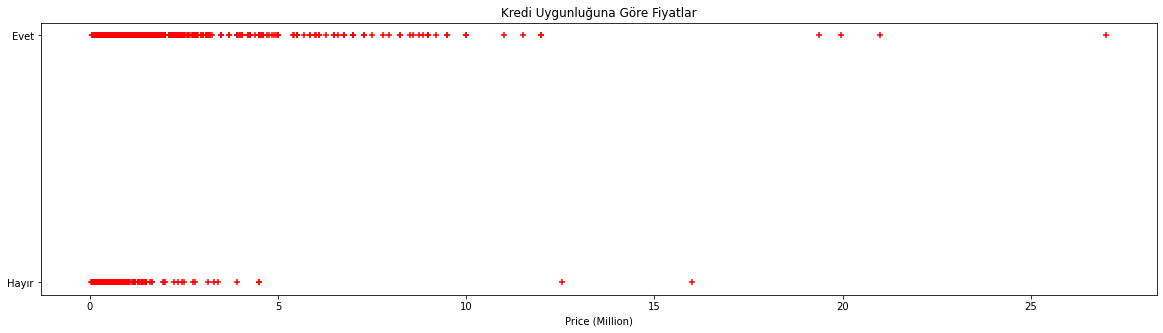

In [375]:
plt.rcParams["figure.figsize"] = (20,5)
plt.scatter(df17["Price"]/1000000,df17["Krediye Uygun"],marker = "+",color = "red") 
plt.xlabel("Price (Million)")
plt.title("Kredi Uygunluğuna Göre Fiyatlar")

Text(0.5, 1.0, 'Konut Tipine Göre Fiyatlar')

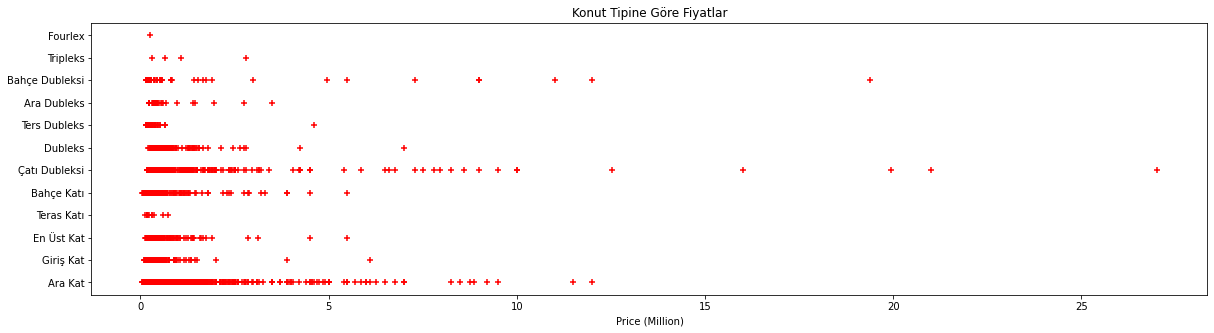

In [376]:
plt.rcParams["figure.figsize"] = (20,5)
plt.scatter(df17["Price"] /1000000,df17["Konut Şekli"],marker = "+",color = "red")
plt.xlabel("Price (Million)")
plt.title("Konut Tipine Göre Fiyatlar")

Text(0.5, 1.0, 'Bina Yaşına Göre Fiyatlar')

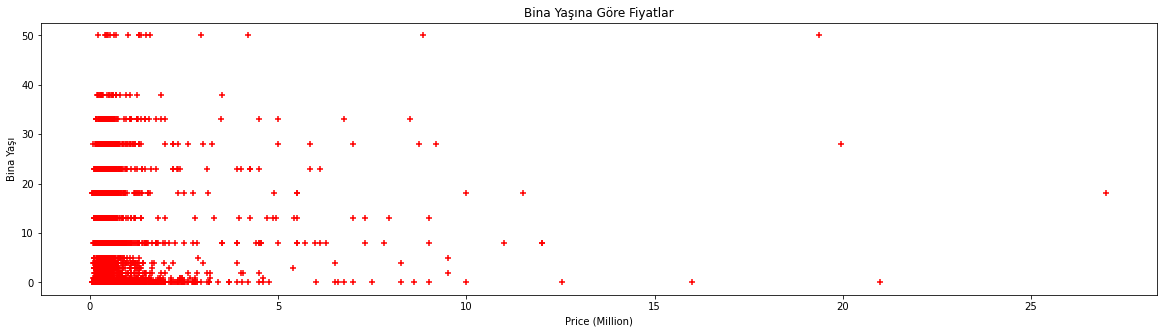

In [377]:
plt.rcParams["figure.figsize"] = (20,5)
plt.scatter(df17["Price"] /1000000,df17["Bina Yaşı"],marker = "+",color = "red")
plt.xlabel("Price (Million)")
plt.ylabel("Bina Yaşı")
plt.title("Bina Yaşına Göre Fiyatlar")

Text(0.5, 1.0, 'Oda Sayısına Göre Fiyatlar')

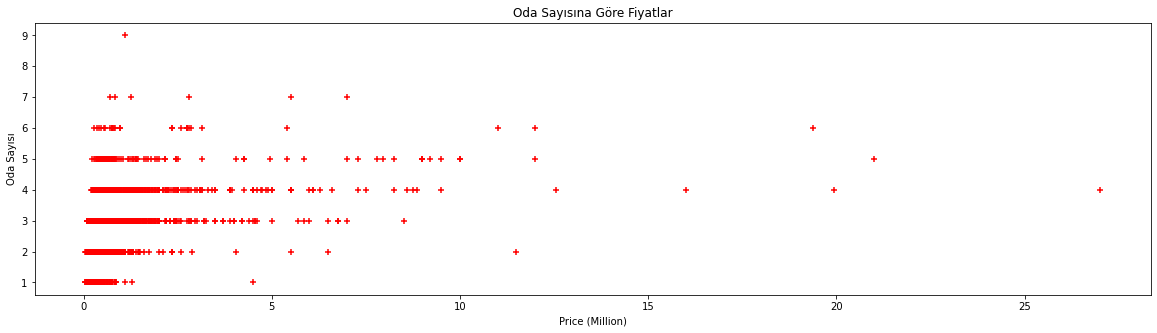

In [378]:
plt.rcParams["figure.figsize"] = (20,5)
plt.scatter(df17["Price"] /1000000,df17["Oda_Sayısı"],marker = "+",color = "red")
plt.xlabel("Price (Million)")
plt.ylabel("Oda Sayısı")
plt.title("Oda Sayısına Göre Fiyatlar")

Text(0.5, 1.0, "Net m²'ye Göre Fiyatlar")

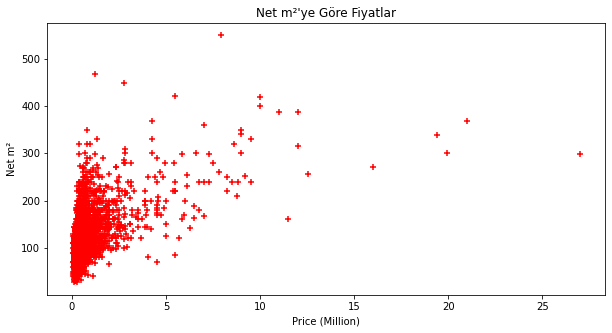

In [379]:
plt.rcParams["figure.figsize"] = (10,5)
plt.scatter(df17["Price"] /1000000,df17["Net m²"],marker = "+",color = "red")
plt.xlabel("Price (Million)")
plt.ylabel("Net m²")
plt.title("Net m²'ye Göre Fiyatlar")

Text(0.5, 1.0, 'Banyo Sayısına Göre Fiyatlar')

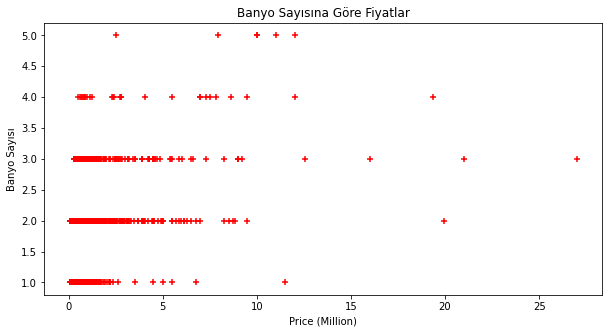

In [380]:
plt.rcParams["figure.figsize"] = (10,5)
plt.scatter(df17["Price"] /1000000,df17["Banyo Sayısı"],marker = "+",color = "red")
plt.xlabel("Price (Million)")
plt.ylabel("Banyo Sayısı")
plt.title("Banyo Sayısına Göre Fiyatlar")

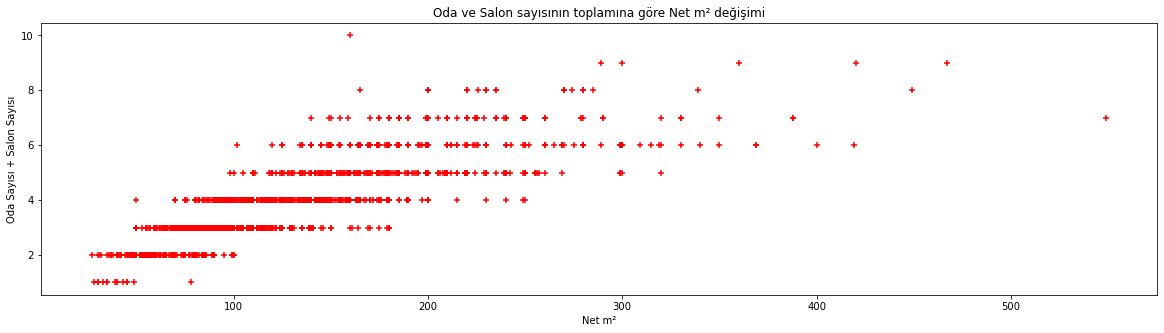

In [381]:
plt.rcParams["figure.figsize"] = (20,5)
plt.scatter(df17["Net m²"] ,df17["Oda_Sayısı"] + df17["Salon"],marker = "+",color = "red")
plt.xlabel("Net m²")
plt.ylabel("Oda Sayısı + Salon Sayısı")
plt.title("Oda ve Salon sayısının toplamına göre Net m² değişimi")

#There are some unrealistic values here.
# A house with 10 rooms cant be 180 m2. It is not realistic.
drop_index = df17[((df17["Oda_Sayısı"] + df17["Salon"]) > 8) & (df17["Net m²"] < 200)].index
df18 = df17.drop(drop_index)

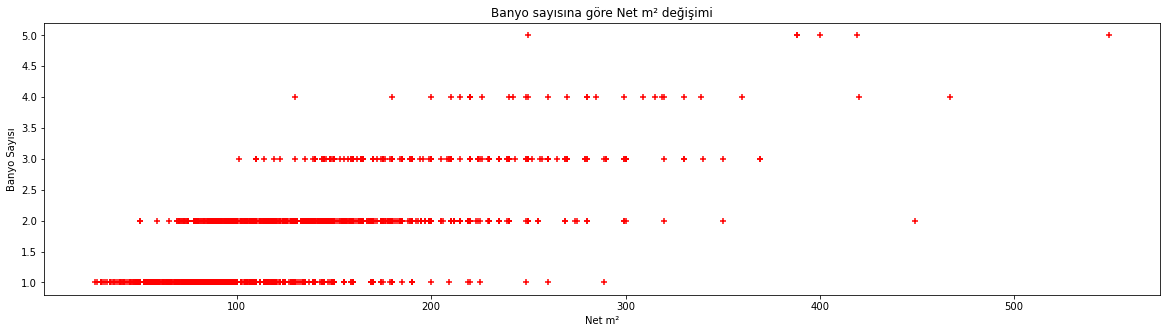

In [382]:
plt.rcParams["figure.figsize"] = (20,5)
plt.scatter(df18["Net m²"] ,df18["Banyo Sayısı"] ,marker = "+",color = "red")
plt.xlabel("Net m²")
plt.ylabel("Banyo Sayısı")
plt.title("Banyo sayısına göre Net m² değişimi")

#There are some unrealistic values here.
drop_index = df18[(df18["Banyo Sayısı"] == 4) & (df18["Net m²"] < 200)].index
df19 = df18.drop(drop_index)
                   
drop_index = df19[(df19["Banyo Sayısı"] == 5) & (df19["Net m²"] < 300)].index
df20 = df19.drop(drop_index)


In [383]:
df21 = df20.replace(["Hayır","Evet"],[0,1]) #Label Encoding



In [384]:
df21["LocationLong"] = df21["Location2"] + " " + df21["Location1"]
df21 = df21.drop(["Location1","Location2"],axis = 1)

In [385]:
#Price Analysis for Locations.
df21.groupby(by = "LocationLong").mean().sort_values(by = "Price",ascending = False)

,Net m²,Banyo Sayısı,Bina Yaşı,Krediye Uygun,Price,Oda_Sayısı,Salon
LocationLong,,,,,,,
Beşiktaş Kuruçeşme,237.000000,1.500000,33.000000,1.000000,1.172500e+07,3.500000,1.000000
Beşiktaş Ulus,258.636364,2.818182,12.454545,1.000000,8.781818e+06,4.090909,1.000000
Beşiktaş Bebek,176.000000,1.750000,32.250000,1.000000,8.457500e+06,3.500000,1.250000
Beşiktaş Ortaköy,193.833333,2.000000,9.166667,1.000000,6.629167e+06,3.500000,1.000000
Sarıyer İstinye,244.285714,2.857143,11.142857,1.000000,6.578571e+06,4.000000,1.000000
...,...,...,...,...,...,...,...
Küçükçekmece Mehmet Akif,80.833333,1.166667,15.000000,0.166667,1.458332e+05,1.666667,0.666667
Esenyurt İstiklal,93.000000,1.000000,0.000000,1.000000,1.450000e+05,2.000000,1.000000
Esenler Yavuz Selim,77.500000,1.000000,23.000000,0.000000,1.425000e+05,2.000000,1.000000


In [386]:
price_list = df21.groupby(by = "LocationLong").mean().sort_values(by = "Price",ascending = False)["Price"].to_list()
locations = df21.groupby(by = "LocationLong").mean().sort_values(by = "Price",ascending = False)["Price"].index
locations_prices = list(zip(locations,price_list))
locations_prices

[('Beşiktaş Kuruçeşme', 11725000.0),
 ('Beşiktaş Ulus', 8781818.181818182),
 ('Beşiktaş Bebek', 8457500.0),
 ('Beşiktaş Ortaköy', 6629166.666666667),
 ('Sarıyer İstinye', 6578571.428571428),
 ('Sarıyer Emirgan', 6400000.0),
 ('Beşiktaş Akat', 5603571.428571428),
 ('Sarıyer Yeniköy', 5550000.0),
 ('Sarıyer Pınar', 5213333.333333333),
 ('Beşiktaş Kültür', 5100000.0),
 ('Bakırköy Basınköy', 4315000.0),
 ('Üsküdar Altunizade', 4135000.0),
 ('Beşiktaş Etiler', 4034000.0),
 ('Bakırköy Yeşilköy', 3906500.0),
 ('Bakırköy Şenlikköy', 3897857.1428571427),
 ('Beşiktaş Vişnezade', 3825000.0),
 ('Bakırköy Yeşilyurt', 3781250.0),
 ('Beşiktaş Levazım', 3500000.0),
 ('Kadıköy Fenerbahçe', 3035185.185185185),
 ('Beşiktaş Arnavutköy', 2845000.0),
 ('Üsküdar Salacak', 2820833.3333333335),
 ('Sarıyer Tarabya', 2276000.0),
 ('Şişli Teşvikiye', 2269718.75),
 ('Kadıköy Caddebostan', 2253421.052631579),
 ('Beşiktaş Levent', 2253333.3333333335),
 ('Beykoz Soğuksu', 2000000.0),
 ('Sarıyer Maden', 1987000.0),
 (

In [387]:
df21

,Net m²,Banyo Sayısı,Bina Yaşı,Konut Şekli,Krediye Uygun,Price,Oda_Sayısı,Salon,LocationLong
1,100.0,2.0,0.0,Ara Kat,0,775000,2.0,1.0,Başakşehir Kayabaşı
2,129.0,2.0,8.0,Ara Kat,1,630000,2.0,1.0,Küçükçekmece Atakent
3,95.0,2.0,0.0,Ara Kat,1,665000,3.0,1.0,Kadıköy Sahrayı Cedit
4,115.0,1.0,0.0,Giriş Kat,1,142000,3.0,1.0,Beylikdüzü Beylikdüzü OSB
5,119.0,1.0,23.0,Ara Kat,1,420000,3.0,1.0,Bahçelievler Soğanlı
...,...,...,...,...,...,...,...,...,...
7031,200.0,3.0,8.0,Bahçe Katı,1,3900000,4.0,1.0,Eyüpsultan Göktürk Merkez
7033,82.0,1.0,18.0,Ara Kat,1,198000,2.0,1.0,Bahçelievler Yenibosna Merkez
7034,92.0,1.0,0.0,Ara Kat,1,249000,2.0,1.0,Sancaktepe Emek
7036,85.0,1.0,18.0,Ara Kat,1,615000,2.0,1.0,Kadıköy Suadiye


In [388]:
# Changing these locations with their mean house prices to reduce dimensions and scaling them. We can think as we giving 
#some points to locations according to price.
df21["PriceMean"] = 0

for i, j in locations_prices:
    
    df21['PriceMean'] = np.where(df21['LocationLong']== i, j, df21["PriceMean"])
    

In [393]:
df22 = df21.drop("LocationLong",axis = 1)

In [394]:
df23 = pd.get_dummies(df22,drop_first = True)

In [395]:
df23.head()

,Net m²,Banyo Sayısı,Bina Yaşı,Krediye Uygun,Price,Oda_Sayısı,Salon,PriceMean,Konut Şekli_Ara Kat,Konut Şekli_Bahçe Dubleksi,Konut Şekli_Bahçe Katı,Konut Şekli_Dubleks,Konut Şekli_En Üst Kat,Konut Şekli_Fourlex,Konut Şekli_Giriş Kat,Konut Şekli_Teras Katı,Konut Şekli_Ters Dubleks,Konut Şekli_Tripleks,Konut Şekli_Çatı Dubleksi
1,100.0,2.0,0.0,0,775000,2.0,1.0,585675.937984,1,0,0,0,0,0,0,0,0,0,0
2,129.0,2.0,8.0,1,630000,2.0,1.0,600973.214286,1,0,0,0,0,0,0,0,0,0,0
3,95.0,2.0,0.0,1,665000,3.0,1.0,649900.000000,1,0,0,0,0,0,0,0,0,0,0
4,115.0,1.0,0.0,1,142000,3.0,1.0,212638.750000,0,0,0,0,0,0,1,0,0,0,0
5,119.0,1.0,23.0,1,420000,3.0,1.0,355210.000000,1,0,0,0,0,0,0,0,0,0,0


In [403]:
X = df23.drop("Price",axis = 1).values
y = df23["Price"]

In [405]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (1,10))
X_scaled = scaler.fit_transform(X)

In [420]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

print(cross_val_score(RandomForestRegressor(n_estimators = 50), X, y, cv=5))

[0.72089989 0.79294009 0.85958881 0.64760278 0.8190099 ]
